# Proyecto Final Machine Learning

- Linnethy Julieth Lambraño Pérez
- Diego Armando Corredor Rivera

### 1. Lectura de la base de datos

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Datos_Ob =pd.read_csv('../Datos/ObesityDataSet_raw_and_data_sinthetic.csv')

#Datos_Ob.info()



#### 1.1 Definición de X y Y

In [111]:
X = Datos_Ob
X = X.drop(['NObeyesdad'],axis = 1)

y = Datos_Ob["NObeyesdad"]


In [112]:
Datos_Ob.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### 2. Tratamiento de variables

#### 2.1 Identificación de tipo de variables y valores faltantes

In [113]:
#Datos_Ob.info()
#Datos_Ob.describe()

Se evidencia que en la base de datos no se encuentra ninguna cantidad de nulos, por lo cual no hay necesidad de realizar algún método de imputación. Por otro lado con el head e info se puede observar el tipo de variables que hay en la base de datos, el cual se clasifica a continuación:

##### 1.Variables Númericas: Age, Height, Weight, FCVC, NCP, CH2O, FAF, TUE

##### 2.Variables Dummy: Gender, family_history_with_overweight, FAVC, SMOKE, SCC, MTRANS

##### 3.Variables Ordinales: CAEC, CALC


In [114]:
#Definición:

Numerica = ["Age","Height","Weight","FCVC","NCP","CH2O","FAF","TUE"]
Categorica = ["Gender", "family_history_with_overweight", "FAVC", "SMOKE", "SCC","MTRANS"]
Ordinales = ["CAEC", "CALC"]

#### 2.2 Identificación datos extremos variables numéricas

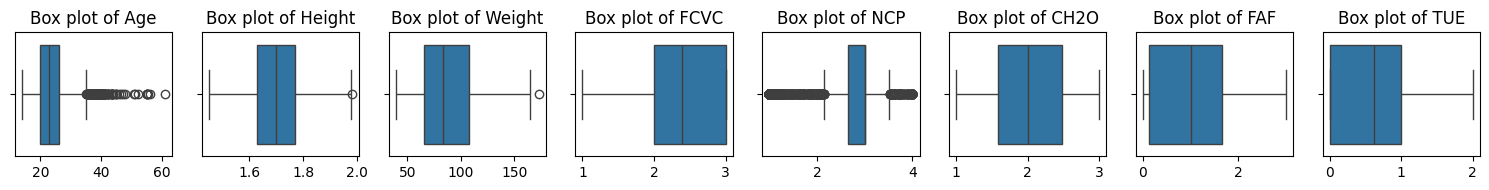

In [115]:

plt.figure(figsize=(15, 2))
for i, variable in enumerate(Numerica, 1):
    plt.subplot(1, 8, i)
    sns.boxplot(x=X[variable])
    plt.title(f'Box plot of {variable}')
    plt.xlabel('')
plt.tight_layout()
plt.show()

Dado que en las variables númericas como la edad se presenta valores continuos, se aplicara una transformación para convertir los datos y encontrar un buen ajuste del modelo.

In [117]:
X['Age'] = round(X['Age'],0)
X['FCVC'] = round(X['FCVC'],0)
X['NCP'] = round(X['NCP'],0)
X['CH2O'] = round(X['CH2O'],0)
X['FAF'] = round(X['FAF'],0)
X['TUE'] = round(X['TUE'],0)

#### 2.3 Definición de los tipos de variables

In [172]:
from sklearn.model_selection import train_test_split

Numerica = ["Age","FCVC","NCP","CH2O","FAF","TUE"]
Categorica = ["Gender", "family_history_with_overweight", "FAVC", "SMOKE", "SCC","MTRANS"]
Ordinales = ["CAEC", "CALC"]

X_Numerica = X[Numerica]
X_Categorica = X[Categorica]
X_Ordinal = X[Ordinales]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=17)

### 3. Preprocesamiento

In [173]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder,  OneHotEncoder
#from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


Categorica_trans = OneHotEncoder(handle_unknown='ignore')
Numerical_trans = StandardScaler()
Ordinal_trans = OrdinalEncoder()


Preprocesamiento = ColumnTransformer(
    transformers=[
        ('Categorica', Categorica_trans, Categorica),
        ('Numerica', Numerical_trans, Numerica),
        ('Oridnal', Ordinal_trans, Ordinales)
    ])



In [151]:
#Ordinal_trans.fit_transform(X_train[Ordinales])

### 4. Entrenamiento

#### 4.1 Random Forest

#### 4.1.1 Modelo

In [174]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB


Random_Forest = RandomForestClassifier(random_state=17)

Modelo_RF = Pipeline(
    [
        ("Preprocesamiento", Preprocesamiento),
        ("Clasificador_RF", Random_Forest),       
    ]
)
Modelo_RF.fit(X_train, y_train)

Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(transformers=[('Categorica',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SMOKE', 'SCC',
                                                   'MTRANS']),
                                                 ('Numerica', StandardScaler(),
                                                  ['Age', 'FCVC', 'NCP', 'CH2O',
                                                   'FAF', 'TUE']),
                                                 ('Oridnal', OrdinalEncoder(),
                                                  ['CAEC', 'CALC'])])),
                ('Clasificador_RF', RandomForestClassifier(random_state=17))])

In [175]:
Pres=Modelo_RF['Preprocesamiento']
#Pres.get_feature_names_out()

In [176]:
DF=pd.DataFrame(Pres.transform(X_train), columns=Pres.get_feature_names_out())
DF

,Categorica__Gender_Female,Categorica__Gender_Male,Categorica__family_history_with_overweight_no,Categorica__family_history_with_overweight_yes,Categorica__FAVC_no,Categorica__FAVC_yes,Categorica__SMOKE_no,Categorica__SMOKE_yes,Categorica__SCC_no,Categorica__SCC_yes,...,Categorica__MTRANS_Public_Transportation,Categorica__MTRANS_Walking,Numerica__Age,Numerica__FCVC,Numerica__NCP,Numerica__CH2O,Numerica__FAF,Numerica__TUE,Oridnal__CAEC,Oridnal__CALC
0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.281146,0.978733,0.388281,1.428676,1.105352,0.495121,2.0,2.0
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,-0.190911,0.978733,-2.080337,-0.041815,-0.019322,1.984898,2.0,2.0
2,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,-0.662968,-0.720960,1.622590,1.428676,1.105352,1.984898,2.0,3.0
3,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.753203,-0.720960,0.388281,-0.041815,1.105352,-0.994656,2.0,2.0
4,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,-0.190911,0.978733,0.388281,1.428676,-0.019322,1.984898,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,-0.505615,0.978733,0.388281,-1.512305,1.105352,-0.994656,0.0,3.0
1684,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,-0.505615,-0.720960,0.388281,1.428676,2.230026,-0.994656,2.0,2.0
1685,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,3.113486,-0.720960,0.388281,1.428676,-1.143996,-0.994656,2.0,2.0
1686,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,4.214952,0.978733,0.388281,1.428676,1.105352,-0.994656,2.0,3.0


#### 4.1.2 Importancia de variables

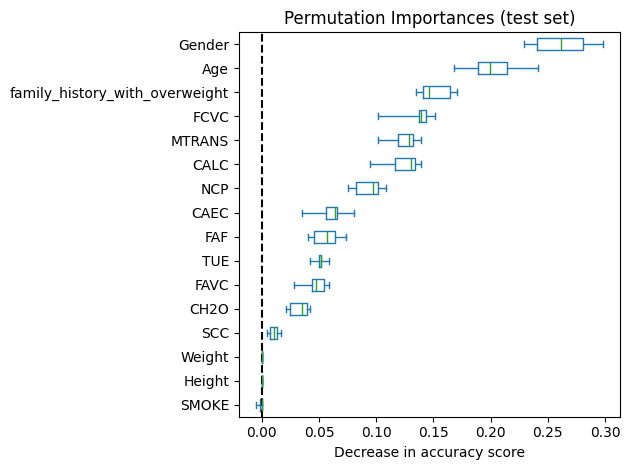

In [207]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    Modelo_RF, X_test, y_test, n_repeats=10, random_state=17, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_test.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In [181]:
#Modelo_RF.set_params(Clasificador__min_samples_leaf=20).fit(X_train, y_train)
#print(f"RF train accuracy: {Modelo_RF.score(X_train, y_train):.3f}")
#print(f"RF test accuracy: {Modelo_RF.score(X_test, y_test):.3f}")

## 4. Modelos y entrenamiento

In [211]:

Modelo_RF.fit(Pres(X_train),Pres(y_train))


TypeError: 'ColumnTransformer' object is not callable

## 5. Tuning parámetros

### 5.1. Random Forest

In [182]:
from sklearn.model_selection import GridSearchCV

parametros_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'criterion':['gini', 'entropy'],
    'random_state': [17]
}


grid_search_RF = GridSearchCV(RandomForestClassifier(), parametros_grid, cv=5, scoring='accuracy')


grid_search_RF.fit(Pres.transform(X_train), y_train)



GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [100, 200, 300],
                         'random_state': [17]},
             scoring='accuracy')

### 5.2. Resultado

In [187]:
# Mejores parámetros
print("Best Parameters:", grid_search_RF.best_params_)

# Mejor score
print("Best Mean Accuracy:", grid_search_RF.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 17}
Best Mean Accuracy: 0.8056976805436061


Con la salida anterior se evidenia los parámetros para el resultado de un accuracy de 0.80

### 5.1.1. Importancia de variables

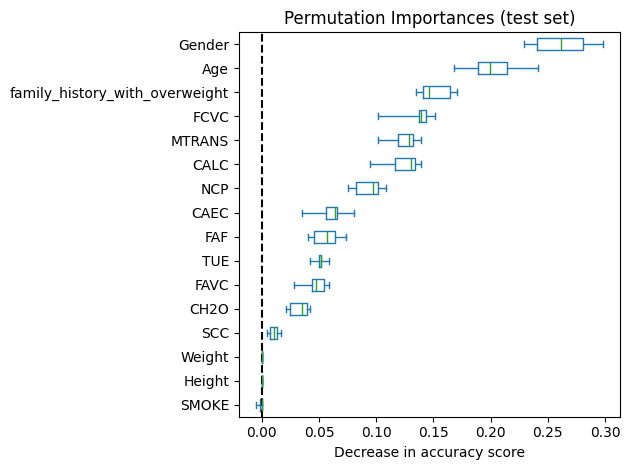

In [202]:

result_RF = permutation_importance(
    Modelo_RF, X_test, y_test, n_repeats=10, random_state=17, n_jobs=2
)

sorted_importances_idx = result_RF.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_test.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

### 5.2. Naive Bayes

In [208]:
Naive_Bayes = GaussianNB()

Modelo_NB = Pipeline(
    [
        ("Preprocesamiento", Preprocesamiento),
        ("Clasificador_NB", Naive_Bayes),       
    ]
)
Modelo_NB.fit(X_train, y_train)

Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(transformers=[('Categorica',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SMOKE', 'SCC',
                                                   'MTRANS']),
                                                 ('Numerica', StandardScaler(),
                                                  ['Age', 'FCVC', 'NCP', 'CH2O',
                                                   'FAF', 'TUE']),
                                                 ('Oridnal', OrdinalEncoder(),
                                                  ['CAEC', 'CALC'])])),
                ('Clasificador_NB', GaussianNB())])

In [196]:
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
np.logspace(0,-9, num=10)


cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=5, 
                                    random_state=999)

parametros_grid = {'var_smoothing': np.logspace(0,-9, num=100)}


grid_search_NB = GridSearchCV(GaussianNB(), parametros_grid, cv=cv_method, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search_NB.fit(Pres.transform(X_train), y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=999),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy')

In [195]:
# Print the best parameters
print("Best Parameters:", grid_search_NB.best_params_)

# Print the best score
print("Best Mean Accuracy:", grid_search_NB.best_score_)

Best Parameters: {'var_smoothing': 0.01873817422860384}
Best Mean Accuracy: 0.537313223184029


### 5.2.1. Importancia de variables


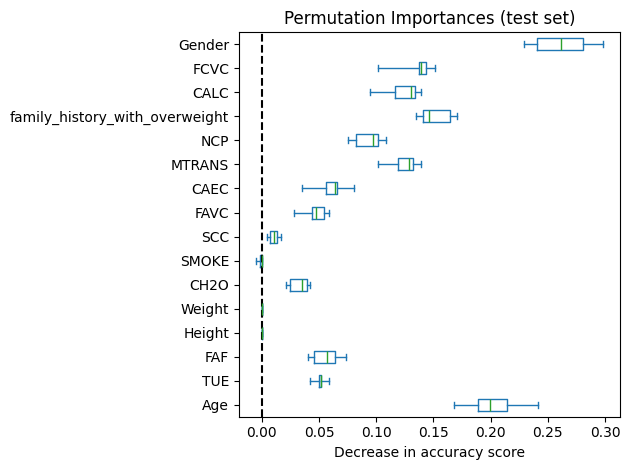

In [201]:

result_NB = permutation_importance(
    Modelo_NB, X_test, y_test, n_repeats=10, random_state=17, n_jobs=2
)

sorted_importances_idx = result_NB.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_test.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

### 5.3. Arboles de Decisión

In [197]:
Decision_Tree = DecisionTreeClassifier()

Modelo_DT = Pipeline(
    [
        ("Preprocesamiento", Preprocesamiento),
        ("Clasificador_NB", Decision_Tree),       
    ]
)
Modelo_DT.fit(X_train, y_train)

Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(transformers=[('Categorica',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SMOKE', 'SCC',
                                                   'MTRANS']),
                                                 ('Numerica', StandardScaler(),
                                                  ['Age', 'FCVC', 'NCP', 'CH2O',
                                                   'FAF', 'TUE']),
                                                 ('Oridnal', OrdinalEncoder(),
                                                  ['CAEC', 'CALC'])])),
                ('Clasificador_NB', DecisionTreeClassifier())])

In [213]:
parametros_grid = {
    'max_depth':[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'random_state':[0,2,4],
    'criterion':['gini', 'entropy'],
    'random_state': [17]
              } 


grid_search_DT = GridSearchCV(DecisionTreeClassifier(), parametros_grid, cv=5, scoring='accuracy')


grid_search_DT.fit(Pres.transform(X_train), y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20],
                         'random_state': [17]},
             scoring='accuracy')

In [214]:
# Print the best parameters
print("Best Parameters:", grid_search_DT.best_params_)

# Print the best score
print("Best Mean Accuracy:", grid_search_DT.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 13, 'random_state': 17}
Best Mean Accuracy: 0.7428915070321142


### 5.3.1. Importancia de variables


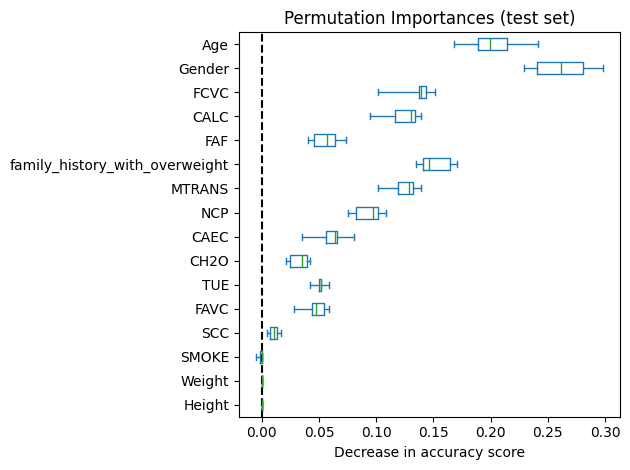

In [204]:

result_DT = permutation_importance(
    Modelo_DT, X_test, y_test, n_repeats=10, random_state=17, n_jobs=2
)

sorted_importances_idx = result_DT.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_test.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

### 6. Evaluación de los modelos

Para la evaluación de los modelos, se tomaran aquellos que presentaron un minimo de 0.7 en su accuracy.

Random Forest Test Accuracy: 0.7966903073286052
Decision Tree Test Accuracy: 0.7990543735224587


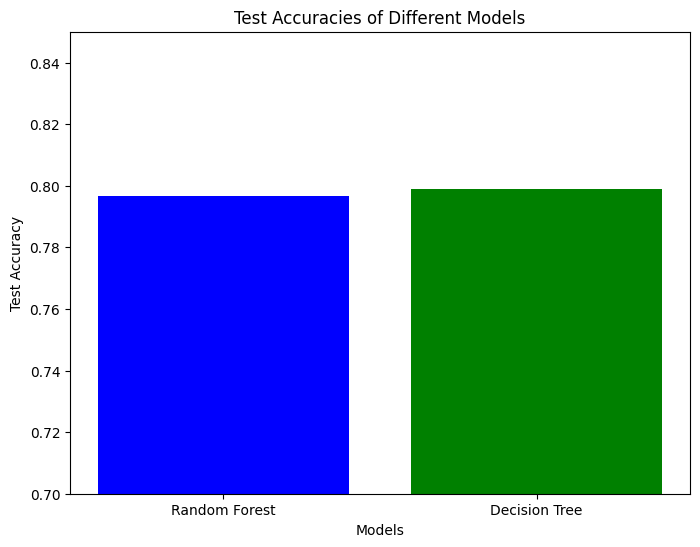

In [226]:
Mejor_Modelo_RF = RandomForestClassifier(criterion='entropy', max_depth=None, min_samples_split=2, n_estimators=100, random_state=17)
Mejor_Modelo_DT = RandomForestClassifier(criterion='entropy', max_depth=13, random_state=17)

# Train the best models on the entire training set
Mejor_Modelo_RF.fit(Pres.transform(X_train), y_train)
Mejor_Modelo_DT.fit(Pres.transform(X_train), y_train)


# Evaluate the best models on the test set
RF_test_accuracy = Mejor_Modelo_RF.score(Pres.transform(X_test), y_test)
DT_test_accuracy = Mejor_Modelo_DT.score(Pres.transform(X_test), y_test)


print("Random Forest Test Accuracy:", RF_test_accuracy)
print("Decision Tree Test Accuracy:", DT_test_accuracy)

import matplotlib.pyplot as plt

# Test accuracies
models = ['Random Forest', 'Decision Tree']
accuracies = [RF_test_accuracy, DT_test_accuracy]

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracies of Different Models')
plt.ylim(0.7, 0.85)  # Set y-axis limits for better visualization
plt.show()

### 7. Predecir

In [237]:
y_pred = Mejor_Modelo_RF.predict(Pres.transform(X_test))
Resultado = pd.DataFrame({'Real': y_test, 'Predicción': y_pred})
print(Resultado.head())

                     Real           Predicción
366   Overweight_Level_II       Obesity_Type_I
1324       Obesity_Type_I       Obesity_Type_I
2098     Obesity_Type_III     Obesity_Type_III
19     Overweight_Level_I  Overweight_Level_II
514   Insufficient_Weight  Insufficient_Weight


### 7.1 Clasificación

In [235]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.86      0.78      0.82        54
      Normal_Weight       0.65      0.67      0.66        58
     Obesity_Type_I       0.73      0.81      0.77        70
    Obesity_Type_II       0.82      0.90      0.86        60
   Obesity_Type_III       0.98      0.98      0.98        65
 Overweight_Level_I       0.79      0.71      0.75        58
Overweight_Level_II       0.75      0.69      0.72        58

           accuracy                           0.80       423
          macro avg       0.80      0.79      0.79       423
       weighted avg       0.80      0.80      0.80       423



### 7.2 Matriz de Confusión

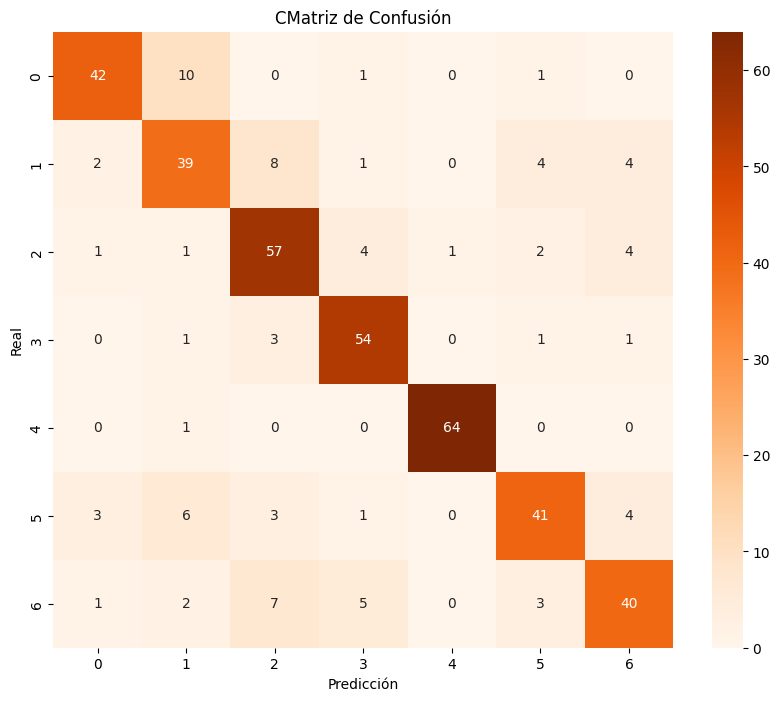

In [245]:
Matrix_Conf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(Matrix_Conf, annot=True, fmt="d", cmap='Oranges')
plt.title("CMatriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()